In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten , Convolution2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

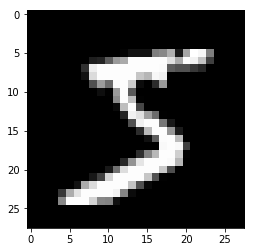

In [ ]:
plt.imshow(x_train[0],cmap='gray')

In [ ]:
X_train = x_train.reshape(-1,28,28,1)
X_test = x_test.reshape(-1,28,28,1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train.shape, Y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
X_train = X_train[:3600]
X_test = X_test[:900]
Y_train = Y_train[:3600]
Y_test = Y_test[:900]


In [ ]:
model = Sequential()

#(28,28,1)

model.add(Convolution2D(32,3,3, input_shape=(28,28,1)))
model.add(Activation('relu'))
#(26,26,32)

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
#(24,24,64)

model.add(MaxPooling2D(pool_size=(2,2)))
#(12,12,64)

model.add(Convolution2D(16,3,3))
model.add(Activation('relu'))
#(10,10,16)

model.add(Flatten())
#(1600)

model.add(Dropout(.25))

model.add(Dense(10)) #Number of classes = 10
model.add(Activation('softmax'))

W0628 11:25:13.562984 140533123536768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
W0628 11:25:13.616289 140533123536768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 11:25:13.625813 140533123536768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to t

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 16)        0         
__________

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0628 11:48:19.131958 140533123536768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 11:48:19.161751 140533123536768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
model.fit(X_train,Y_train,
         validation_data = (X_test, Y_test),
         batch_size=16,
         nb_epoch=12,
         verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """
W0628 11:52:18.932500 140533123536768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 11s - loss: 1.7461 - acc: 0.7114 - val_loss: 0.2889 - val_acc: 0.9122
Epoch 2/12
 - 10s - loss: 0.2749 - acc: 0.9194 - val_loss: 0.1757 - val_acc: 0.9389
Epoch 3/12
 - 10s - loss: 0.1574 - acc: 0.9528 - val_loss: 0.1691 - val_acc: 0.9422
Epoch 4/12
 - 10s - loss: 0.1211 - acc: 0.9631 - val_loss: 0.1811 - val_acc: 0.9400
Epoch 5/12
 - 10s - loss: 0.0926 - acc: 0.9725 - val_loss: 0.1227 - val_acc: 0.9633
Epoch 6/12
 - 10s - loss: 0.0661 - acc: 0.9786 - val_loss: 0.1230 - val_acc: 0.9644
Epoch 7/12
 - 10s - loss: 0.0650 - acc: 0.9797 - val_loss: 0.1470 - val_acc: 0.9567
Epoch 8/12
 - 10s - loss: 0.0671 - acc: 0.9797 - val_loss: 0.1481 - val_acc: 0.9533
Epoch 9/12
 - 10s - loss: 0.0819 - acc: 0.9778 - val_loss: 0.2152 - val_acc: 0.9456
Epoch 10/12
 - 10s - loss: 0.0731 - acc: 0.9789 - val_loss: 0.1713 - val_acc: 0.9556
Epoch 11/12
 - 10s - loss: 0.0361 - acc: 0.9889 - val_loss: 0.1236 - val_acc: 0.9667
Epoch 12/12
 - 10s - loss: 